In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
pistons_stats = pd.read_csv("/content/Pistons_Year_over_Year_Stats.csv")
pistons_opponent_stats = pd.read_csv("/content/Pistons_Opponent_Year_over_Year_Stats.csv")
pistons_wins = pd.read_csv("/content/Pistons YoY Basic Stats - Sheet1.csv")
pd.set_option('display.max_columns', None)

In [21]:
# Cleaning, you should be a pro at this by now!
pistons_stats.drop(columns=["Unnamed: 3", "Unnamed: 7"], inplace=True)
pistons_stats = pistons_stats[pistons_stats["Season"] != "Season"]
pistons_stats.head(30)

,Season,Lg,Tm,Age,Ht.,Wt.,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,NBA,DET,8.4%,-0.3%,-1.8%,82,0.3%,4.5%,1.8%,+.012,16.0%,11.5%,+.014,0.2%,-3.7%,+.021,1.1%,2.6%,-.011,8.1%,1.7%,3.3%,3.7%,22.8%,12.2%,-2.3%,0.4%,5.1%
1,2023-24,NBA,DET,-1.2%,0.3%,0.0%,82,-0.3%,3.4%,1.3%,+.009,-3.0%,-2.1%,-.003,5.9%,3.4%,+.013,-13.9%,-15.5%,+.015,-6.0%,5.0%,2.1%,10.8%,-7.5%,24.7%,0.9%,-6.9%,-0.4%
2,2022-23,NBA,DET,2.1%,0.4%,1.4%,82,0.1%,3.7%,-1.7%,+.024,1.0%,-6.3%,+.025,4.8%,1.2%,+.018,14.9%,16.6%,-.012,1.8%,-2.3%,-1.3%,-2.1%,-8.9%,-21.6%,6.4%,0.8%,5.2%
3,2021-22,NBA,DET,-3.7%,-0.5%,-0.9%,82,13.5%,12.4%,17.9%,-.021,11.2%,19.7%,-.025,13.0%,16.8%,-.017,10.6%,7.3%,+.023,29.7%,10.2%,14.6%,10.4%,18.6%,5.9%,8.2%,21.8%,12.0%
4,2020-21,NBA,DET,-5.4%,0.5%,-0.5%,72,9.2%,7.2%,8.9%,-.007,5.2%,9.9%,-.016,8.1%,8.3%,-.001,16.5%,14.0%,+.016,7.8%,12.9%,11.7%,9.7%,8.4%,24.1%,6.6%,13.7%,8.4%
5,2019-20,NBA,DET,-3.7%,0.4%,-3.1%,66,-19.6%,-18.5%,-21.8%,+.019,-20.3%,-24.4%,+.019,-17.7%,-20.1%,+.015,-22.5%,-22.0%,-.004,-31.2%,-23.4%,-25.4%,-13.9%,-13.9%,-9.7%,-11.2%,-28.3%,-19.4%
6,2018-19,NBA,DET,3.9%,-0.9%,0.4%,82,0.3%,-0.7%,1.5%,-.010,12.1%,20.3%,-.025,-5.6%,-7.8%,+.012,17.2%,16.8%,+.003,12.8%,-0.1%,2.8%,-1.2%,-9.4%,4.4%,3.0%,20.1%,3.2%
7,2017-18,NBA,DET,2.0%,-1.0%,-2.2%,82,0.0%,-1.9%,-2.1%,+.001,40.4%,23.9%,+.044,-12.0%,-11.4%,-.003,5.9%,2.2%,+.026,-8.6%,-2.9%,-4.3%,7.9%,9.4%,2.3%,13.3%,2.8%,2.4%
8,2016-17,NBA,DET,1.6%,0.0%,-0.4%,82,-0.4%,5.1%,2.8%,+.010,-14.7%,-10.8%,-.015,11.3%,8.7%,+.011,-18.5%,-24.3%,+.051,-11.1%,2.2%,-1.4%,8.7%,0.2%,2.0%,-12.3%,-5.8%,-0.6%
9,2015-16,NBA,DET,-3.5%,0.8%,3.6%,82,0.3%,2.3%,0.7%,+.007,5.3%,5.1%,+.000,1.4%,-1.1%,+.012,8.3%,14.0%,-.035,-2.9%,5.6%,3.2%,-10.0%,-8.0%,-20.6%,1.0%,-0.1%,3.5%


In [22]:
pistons_opponent_stats.drop(columns=["Unnamed: 3"], inplace=True)
pistons_opponent_stats = pistons_opponent_stats[pistons_opponent_stats["Season"] != "Season"]
pistons_opponent_stats.head()

,Season,Lg,Tm,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2024-25,NBA,DET,82,0.3%,-7.0%,-1.2%,-.029,12.9%,13.9%,-.003,-14.7%,-10.0%,-.029,-4.1%,-1.2%,-.024,9.1%,-4.6%,-1.6%,-8.2%,0.1%,-15.7%,21.2%,6.5%,-4.5%
1,2023-24,NBA,DET,82,-0.3%,1.3%,1.1%,+.001,0.7%,-1.8%,+.009,1.5%,2.9%,-.008,-3.5%,-6.3%,+.023,-12.2%,-0.8%,-3.6%,4.9%,15.2%,8.2%,-8.0%,-15.2%,0.4%
2,2022-23,NBA,DET,82,0.1%,6.0%,2.4%,+.017,1.9%,2.4%,-.002,7.7%,2.4%,+.028,4.5%,4.5%,-.000,6.4%,-6.1%,-3.3%,2.5%,4.1%,6.1%,-7.4%,5.7%,5.3%
3,2021-22,NBA,DET,82,13.5%,11.8%,12.6%,-.003,18.2%,18.1%,+.001,9.4%,9.6%,-.001,30.8%,27.9%,+.017,18.1%,19.0%,18.8%,15.5%,4.8%,1.9%,19.2%,10.6%,15.4%
4,2020-21,NBA,DET,72,9.2%,7.7%,8.6%,-.004,15.9%,15.8%,+.000,4.8%,4.9%,-.000,13.9%,16.5%,-.018,7.3%,12.3%,11.1%,9.8%,6.4%,13.6%,8.8%,12.3%,9.4%


In [23]:
# Grab a subset of data from the opponent stats that I want to look at
opp_subset = pistons_opponent_stats[["Season", "FG", "FG%", "3P", "3P%", "ORB", "DRB", "TOV", "PTS", "PF"]]
opp_subset = opp_subset.add_prefix("opp_")
opp_subset.rename(columns={"opp_Season": "Season"}, inplace=True)
opp_subset.head()

,Season,opp_FG,opp_FG%,opp_3P,opp_3P%,opp_ORB,opp_DRB,opp_TOV,opp_PTS,opp_PF
0,2024-25,-7.0%,-.029,12.9%,-.003,9.1%,-4.6%,21.2%,-4.5%,6.5%
1,2023-24,1.3%,+.001,0.7%,+.009,-12.2%,-0.8%,-8.0%,0.4%,-15.2%
2,2022-23,6.0%,+.017,1.9%,-.002,6.4%,-6.1%,-7.4%,5.3%,5.7%
3,2021-22,11.8%,-.003,18.2%,+.001,18.1%,19.0%,19.2%,15.4%,10.6%
4,2020-21,7.7%,-.004,15.9%,+.000,7.3%,12.3%,8.8%,9.4%,12.3%


In [24]:
pistons_wins = pistons_wins[["Season", "W", "L"]]
pistons_wins.head()

,Season,W,L
0,2025-26,3,2
1,2024-25,44,38
2,2023-24,14,68
3,2022-23,17,65
4,2021-22,23,59


In [25]:
# Merge all the data into one nice dataframe
merged = pd.merge(pistons_stats, opp_subset, on="Season")
merged = pd.merge(merged, pistons_wins, on="Season")
merged.head()

,Season,Lg,Tm,Age,Ht.,Wt.,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,opp_FG,opp_FG%,opp_3P,opp_3P%,opp_ORB,opp_DRB,opp_TOV,opp_PTS,opp_PF,W,L
0,2024-25,NBA,DET,8.4%,-0.3%,-1.8%,82,0.3%,4.5%,1.8%,+.012,16.0%,11.5%,+.014,0.2%,-3.7%,+.021,1.1%,2.6%,-.011,8.1%,1.7%,3.3%,3.7%,22.8%,12.2%,-2.3%,0.4%,5.1%,-7.0%,-.029,12.9%,-.003,9.1%,-4.6%,21.2%,-4.5%,6.5%,44,38
1,2023-24,NBA,DET,-1.2%,0.3%,0.0%,82,-0.3%,3.4%,1.3%,+.009,-3.0%,-2.1%,-.003,5.9%,3.4%,+.013,-13.9%,-15.5%,+.015,-6.0%,5.0%,2.1%,10.8%,-7.5%,24.7%,0.9%,-6.9%,-0.4%,1.3%,+.001,0.7%,+.009,-12.2%,-0.8%,-8.0%,0.4%,-15.2%,14,68
2,2022-23,NBA,DET,2.1%,0.4%,1.4%,82,0.1%,3.7%,-1.7%,+.024,1.0%,-6.3%,+.025,4.8%,1.2%,+.018,14.9%,16.6%,-.012,1.8%,-2.3%,-1.3%,-2.1%,-8.9%,-21.6%,6.4%,0.8%,5.2%,6.0%,+.017,1.9%,-.002,6.4%,-6.1%,-7.4%,5.3%,5.7%,17,65
3,2021-22,NBA,DET,-3.7%,-0.5%,-0.9%,82,13.5%,12.4%,17.9%,-.021,11.2%,19.7%,-.025,13.0%,16.8%,-.017,10.6%,7.3%,+.023,29.7%,10.2%,14.6%,10.4%,18.6%,5.9%,8.2%,21.8%,12.0%,11.8%,-.003,18.2%,+.001,18.1%,19.0%,19.2%,15.4%,10.6%,23,59
4,2020-21,NBA,DET,-5.4%,0.5%,-0.5%,72,9.2%,7.2%,8.9%,-.007,5.2%,9.9%,-.016,8.1%,8.3%,-.001,16.5%,14.0%,+.016,7.8%,12.9%,11.7%,9.7%,8.4%,24.1%,6.6%,13.7%,8.4%,7.7%,-.004,15.9%,+.000,7.3%,12.3%,8.8%,9.4%,12.3%,20,52


In [26]:
# Python likes to read variables as strings, let's make some into numbers
non_numeric_cols = ['Season', 'Lg', 'Tm']

for col in merged.columns:
    if col not in non_numeric_cols:
        merged[col] = (
            merged[col].astype(str)
            .str.replace('%', '', regex=False)
            .str.replace('+', '', regex=False)
            .str.replace('−', '-', regex=False)
        )
        merged[col] = pd.to_numeric(merged[col], errors='coerce')
    else:
        merged[col] = merged[col].astype(str)

In [27]:
merged.head()

,Season,Lg,Tm,Age,Ht.,Wt.,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,opp_FG,opp_FG%,opp_3P,opp_3P%,opp_ORB,opp_DRB,opp_TOV,opp_PTS,opp_PF,W,L
0,2024-25,NBA,DET,8.4,-0.3,-1.8,82,0.3,4.5,1.8,0.012,16.0,11.5,0.014,0.2,-3.7,0.021,1.1,2.6,-0.011,8.1,1.7,3.3,3.7,22.8,12.2,-2.3,0.4,5.1,-7.0,-0.029,12.9,-0.003,9.1,-4.6,21.2,-4.5,6.5,44,38
1,2023-24,NBA,DET,-1.2,0.3,0.0,82,-0.3,3.4,1.3,0.009,-3.0,-2.1,-0.003,5.9,3.4,0.013,-13.9,-15.5,0.015,-6.0,5.0,2.1,10.8,-7.5,24.7,0.9,-6.9,-0.4,1.3,0.001,0.7,0.009,-12.2,-0.8,-8.0,0.4,-15.2,14,68
2,2022-23,NBA,DET,2.1,0.4,1.4,82,0.1,3.7,-1.7,0.024,1.0,-6.3,0.025,4.8,1.2,0.018,14.9,16.6,-0.012,1.8,-2.3,-1.3,-2.1,-8.9,-21.6,6.4,0.8,5.2,6.0,0.017,1.9,-0.002,6.4,-6.1,-7.4,5.3,5.7,17,65
3,2021-22,NBA,DET,-3.7,-0.5,-0.9,82,13.5,12.4,17.9,-0.021,11.2,19.7,-0.025,13.0,16.8,-0.017,10.6,7.3,0.023,29.7,10.2,14.6,10.4,18.6,5.9,8.2,21.8,12.0,11.8,-0.003,18.2,0.001,18.1,19.0,19.2,15.4,10.6,23,59
4,2020-21,NBA,DET,-5.4,0.5,-0.5,72,9.2,7.2,8.9,-0.007,5.2,9.9,-0.016,8.1,8.3,-0.001,16.5,14.0,0.016,7.8,12.9,11.7,9.7,8.4,24.1,6.6,13.7,8.4,7.7,-0.004,15.9,0.000,7.3,12.3,8.8,9.4,12.3,20,52


Now let's try to preprocess! End goal: try and model the number of wins in a season and build a classification model for over/under .500 in a season.

In [28]:
# Correlations!
merged.corr(numeric_only=True)

,Age,Ht.,Wt.,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,opp_FG,opp_FG%,opp_3P,opp_3P%,opp_ORB,opp_DRB,opp_TOV,opp_PTS,opp_PF,W,L
Age,1.000000,-0.289833,-0.179365,0.081063,0.007628,0.016998,-0.025806,0.187484,0.203367,0.233238,0.198398,-0.063322,-0.117705,0.238669,0.031555,-0.025454,0.329905,-0.192553,-0.035901,-0.044481,0.036890,-0.079217,-0.195316,-0.226265,-0.120254,0.046060,-0.004304,0.030224,0.079573,0.195173,-0.033528,-0.042823,-0.028307,-0.021226,-0.007654,0.406200,-0.375383
Ht.,-0.289833,1.000000,0.330987,-0.033658,0.130762,0.114426,0.077842,0.190332,-0.127211,-0.131648,-0.017227,0.150110,0.130462,0.119887,0.110882,0.110424,0.038928,-0.086773,0.107133,0.009648,0.090904,0.085331,-0.039830,0.157642,0.145233,0.111701,0.116098,0.182729,0.015357,0.055357,-0.029349,0.069362,0.097914,0.097532,0.093480,-0.039857,0.024715
Wt.,-0.179365,0.330987,1.000000,0.021385,-0.032122,-0.033399,-0.033356,-0.019202,0.152120,0.125998,-0.015173,-0.037749,-0.045983,0.032947,0.092403,0.122286,-0.110731,0.025227,-0.036643,0.005450,0.016118,-0.029511,-0.037649,0.070099,0.164263,0.001566,-0.022789,0.179341,-0.064116,-0.089980,-0.206273,-0.068118,-0.046382,0.002602,0.088070,-0.069670,0.081022
G,0.081063,-0.033658,0.021385,1.000000,0.549372,0.263429,0.329414,-0.128339,0.174928,0.250500,-0.118715,0.247409,0.299981,-0.053661,0.220861,0.238935,-0.049966,0.480469,0.464141,0.318679,0.248765,0.391287,0.251766,0.342205,0.284403,0.268272,0.437080,0.133312,0.251657,-0.061836,0.424639,0.464661,0.388771,0.259796,0.381030,0.307281,0.233217
MP,0.007628,0.130762,-0.032122,0.549372,1.000000,0.951352,0.961327,0.092604,0.240738,0.393938,-0.120413,0.915586,0.907124,0.165648,0.847700,0.834171,0.118793,0.747294,0.940068,0.907738,0.845131,0.656570,0.375076,0.782110,0.881418,0.962680,0.949841,0.252065,0.445039,0.039473,0.866615,0.958164,0.821863,0.953354,0.898081,0.074949,0.154131
FG,0.016998,0.114426,-0.033399,0.263429,0.951352,1.000000,0.969943,0.292031,0.322453,0.453939,-0.028385,0.971637,0.926723,0.341459,0.785290,0.781265,0.072109,0.745666,0.910042,0.867539,0.808502,0.680544,0.383341,0.722280,0.806522,0.985966,0.964983,0.326338,0.478089,0.081106,0.887672,0.945477,0.817703,0.963241,0.839845,0.074110,0.060015
FGA,-0.025806,0.077842,-0.033356,0.329414,0.961327,0.969943,1.000000,0.056018,0.274388,0.421442,-0.108121,0.949804,0.960595,0.125405,0.780181,0.778429,0.050733,0.818356,0.922575,0.908480,0.742422,0.680132,0.383825,0.737254,0.839942,0.958799,0.955418,0.285950,0.447677,0.049176,0.878934,0.975422,0.829319,0.955640,0.850616,0.066941,0.101051
FG%,0.187484,0.190332,-0.019202,-0.128339,0.092604,0.292031,0.056018,1.000000,0.316761,0.254126,0.425420,0.252574,0.029834,0.936458,0.142093,0.132155,0.099612,-0.249929,0.070004,-0.056420,0.403731,0.125433,0.074635,0.022678,-0.007780,0.276476,0.201232,0.275306,0.256621,0.189019,0.193633,-0.010051,0.065500,0.200931,0.058498,0.038906,-0.105042
3P,0.203367,-0.127211,0.152120,0.174928,0.240738,0.322453,0.274388,0.316761,1.000000,0.942764,0.632786,0.205954,0.138259,0.372609,0.206674,0.181833,0.157875,0.111532,0.296604,0.251447,0.382914,0.009494,0.183738,0.065530,0.191504,0.338603,0.300602,0.108851,0.145688,-0.091255,0.313949,0.276731,0.143999,0.277632,0.262442,0.162192,-0.088629
3PA,0.233238,-0.131648,0.125998,0.250500,0.393938,0.453939,0.421442,0.254126,0.942764,1.000000,0.489593,0.320996,0.253939,0.390283,0.308530,0.288406,0.141203,0.239888,0.425383,0.386954,0.493494,0.154732,0.252550,0.208747,0.347408,0.469465,0.438182,0.167151,0.239105,-0.037501,0.426011,0.434382,0.293507,0.424235,0.377843,0.192867,-0.085714


In [29]:
# Win % may be easier to model so let's add that
merged["Win%"] = merged["W"] / merged["G"]
merged.head()

,Season,Lg,Tm,Age,Ht.,Wt.,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,opp_FG,opp_FG%,opp_3P,opp_3P%,opp_ORB,opp_DRB,opp_TOV,opp_PTS,opp_PF,W,L,Win%
0,2024-25,NBA,DET,8.4,-0.3,-1.8,82,0.3,4.5,1.8,0.012,16.0,11.5,0.014,0.2,-3.7,0.021,1.1,2.6,-0.011,8.1,1.7,3.3,3.7,22.8,12.2,-2.3,0.4,5.1,-7.0,-0.029,12.9,-0.003,9.1,-4.6,21.2,-4.5,6.5,44,38,0.536585
1,2023-24,NBA,DET,-1.2,0.3,0.0,82,-0.3,3.4,1.3,0.009,-3.0,-2.1,-0.003,5.9,3.4,0.013,-13.9,-15.5,0.015,-6.0,5.0,2.1,10.8,-7.5,24.7,0.9,-6.9,-0.4,1.3,0.001,0.7,0.009,-12.2,-0.8,-8.0,0.4,-15.2,14,68,0.170732
2,2022-23,NBA,DET,2.1,0.4,1.4,82,0.1,3.7,-1.7,0.024,1.0,-6.3,0.025,4.8,1.2,0.018,14.9,16.6,-0.012,1.8,-2.3,-1.3,-2.1,-8.9,-21.6,6.4,0.8,5.2,6.0,0.017,1.9,-0.002,6.4,-6.1,-7.4,5.3,5.7,17,65,0.207317
3,2021-22,NBA,DET,-3.7,-0.5,-0.9,82,13.5,12.4,17.9,-0.021,11.2,19.7,-0.025,13.0,16.8,-0.017,10.6,7.3,0.023,29.7,10.2,14.6,10.4,18.6,5.9,8.2,21.8,12.0,11.8,-0.003,18.2,0.001,18.1,19.0,19.2,15.4,10.6,23,59,0.280488
4,2020-21,NBA,DET,-5.4,0.5,-0.5,72,9.2,7.2,8.9,-0.007,5.2,9.9,-0.016,8.1,8.3,-0.001,16.5,14.0,0.016,7.8,12.9,11.7,9.7,8.4,24.1,6.6,13.7,8.4,7.7,-0.004,15.9,0.000,7.3,12.3,8.8,9.4,12.3,20,52,0.277778


In [30]:
# What correlates strongly with win %?
win_percentage_corr = merged.corr(numeric_only=True)["Win%"]
win_percentage_corr.sort_values(ascending=False)

,Win%
Win%,1.000000
W,0.964879
Age,0.410264
3P%,0.164879
3PA,0.146244
3P,0.132484
opp_3P%,0.123920
opp_3P,0.122369
FG%,0.076684
2P%,0.069088


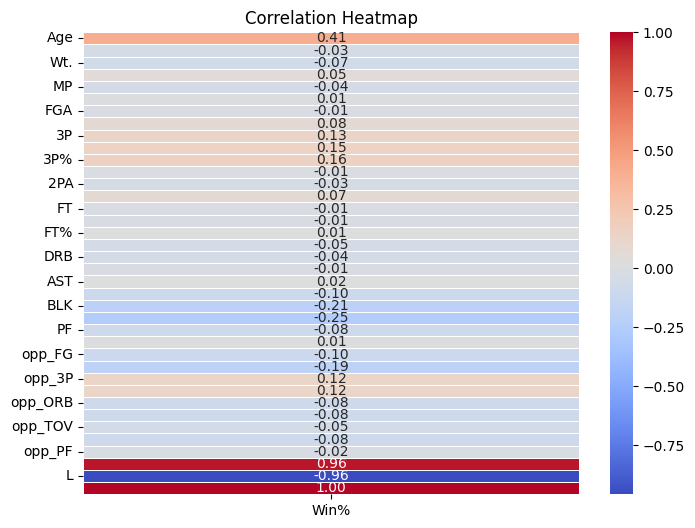

In [31]:
corr = pd.DataFrame(win_percentage_corr)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Let's make a column for over/under .500 for classification
# 1 is over .500, 0 is <= .500
merged["over_500"] = merged["Win%"].apply(lambda x: 1 if x > .500 else 0)
merged.head()

,Season,Lg,Tm,Age,Ht.,Wt.,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,opp_FG,opp_FG%,opp_3P,opp_3P%,opp_ORB,opp_DRB,opp_TOV,opp_PTS,opp_PF,W,L,Win%,over_500
0,2024-25,NBA,DET,8.4,-0.3,-1.8,82,0.3,4.5,1.8,0.012,16.0,11.5,0.014,0.2,-3.7,0.021,1.1,2.6,-0.011,8.1,1.7,3.3,3.7,22.8,12.2,-2.3,0.4,5.1,-7.0,-0.029,12.9,-0.003,9.1,-4.6,21.2,-4.5,6.5,44,38,0.536585,1
1,2023-24,NBA,DET,-1.2,0.3,0.0,82,-0.3,3.4,1.3,0.009,-3.0,-2.1,-0.003,5.9,3.4,0.013,-13.9,-15.5,0.015,-6.0,5.0,2.1,10.8,-7.5,24.7,0.9,-6.9,-0.4,1.3,0.001,0.7,0.009,-12.2,-0.8,-8.0,0.4,-15.2,14,68,0.170732,0
2,2022-23,NBA,DET,2.1,0.4,1.4,82,0.1,3.7,-1.7,0.024,1.0,-6.3,0.025,4.8,1.2,0.018,14.9,16.6,-0.012,1.8,-2.3,-1.3,-2.1,-8.9,-21.6,6.4,0.8,5.2,6.0,0.017,1.9,-0.002,6.4,-6.1,-7.4,5.3,5.7,17,65,0.207317,0
3,2021-22,NBA,DET,-3.7,-0.5,-0.9,82,13.5,12.4,17.9,-0.021,11.2,19.7,-0.025,13.0,16.8,-0.017,10.6,7.3,0.023,29.7,10.2,14.6,10.4,18.6,5.9,8.2,21.8,12.0,11.8,-0.003,18.2,0.001,18.1,19.0,19.2,15.4,10.6,23,59,0.280488,0
4,2020-21,NBA,DET,-5.4,0.5,-0.5,72,9.2,7.2,8.9,-0.007,5.2,9.9,-0.016,8.1,8.3,-0.001,16.5,14.0,0.016,7.8,12.9,11.7,9.7,8.4,24.1,6.6,13.7,8.4,7.7,-0.004,15.9,0.000,7.3,12.3,8.8,9.4,12.3,20,52,0.277778,0


In [35]:
# Preprocessing example -- I don't actually need to scale here
# We can see, though, that 3P has way higher values than all the percentages
# so that would have been a good one to normalize if we needed it!
scaler = Normalizer()
example = merged[["3P"]]
example.fillna(0, inplace=True)
example = scaler.fit_transform(example)
example

/tmp/ipython-input-674370460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example.fillna(0, inplace=True)


array([[ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [36]:
example = merged[["3P"]]
scaler = RobustScaler()
example.fillna(0, inplace=True)
example = scaler.fit_transform(example)
example


/tmp/ipython-input-3815428017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example.fillna(0, inplace=True)


array([[ 1.32231405],
       [-0.24793388],
       [ 0.08264463],
       [ 0.92561983],
       [ 0.42975207],
       [-1.67768595],
       [ 1.        ],
       [ 3.33884298],
       [-1.21487603],
       [ 0.43801653],
       [ 3.19834711],
       [-0.09917355],
       [ 5.10743802],
       [-2.7107438 ],
       [ 2.16528926],
       [-0.0661157 ],
       [-1.8677686 ],
       [ 0.70247934],
       [-1.60330579],
       [ 4.41322314],
       [ 0.74380165],
       [-3.09917355],
       [-0.49586777],
       [ 3.78512397],
       [-0.94214876],
       [ 6.36363636],
       [-1.27272727],
       [-4.10743802],
       [ 0.56198347],
       [ 0.85123967],
       [ 3.14049587],
       [ 1.8677686 ],
       [ 6.36363636],
       [ 2.14876033],
       [-2.14876033],
       [ 3.92561983],
       [ 8.83471074],
       [ 4.02479339],
       [-2.40495868],
       [ 1.83471074],
       [ 3.3553719 ],
       [-4.59504132],
       [ 3.18181818],
       [24.79338843],
       [-6.38016529],
       [ 0

In [37]:
example = merged[["3P"]]
scaler = MinMaxScaler()
example.fillna(0, inplace=True)
example = scaler.fit_transform(example)
example

/tmp/ipython-input-866333497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example.fillna(0, inplace=True)


array([[0.24708378],
       [0.19671262],
       [0.20731707],
       [0.23435843],
       [0.21845175],
       [0.15084836],
       [0.23674443],
       [0.31177094],
       [0.16569459],
       [0.21871686],
       [0.30726405],
       [0.20148462],
       [0.36850477],
       [0.11770944],
       [0.27412513],
       [0.20254507],
       [0.1447508 ],
       [0.22720042],
       [0.15323436],
       [0.34623542],
       [0.22852598],
       [0.1052492 ],
       [0.18875928],
       [0.32608696],
       [0.17444327],
       [0.4088017 ],
       [0.16383881],
       [0.07290562],
       [0.22269353],
       [0.23197243],
       [0.30540827],
       [0.26458112],
       [0.4088017 ],
       [0.27359491],
       [0.13573701],
       [0.33059385],
       [0.48806999],
       [0.33377519],
       [0.12751856],
       [0.26352068],
       [0.31230117],
       [0.05726405],
       [0.30673383],
       [1.        ],
       [0.        ],
       [0.20466596],
       [0.20466596],
       [0.204

In [ ]:
# If you want an example of one-hot encoding, look at last week's example code!
# I don't need to do any here

In [72]:
# Dimensionality reduction
X = merged[["Age", "3P%", "opp_3P%", "BLK", "TOV", "opp_FG%"]]
y1 = merged["Win%"]
y2 = merged["over_500"]
X.head()

,Age,3P%,opp_3P%,BLK,TOV,opp_FG%
0,8.4,0.014,-0.003,12.2,-2.3,-0.029
1,-1.2,-0.003,0.009,24.7,0.9,0.001
2,2.1,0.025,-0.002,-21.6,6.4,0.017
3,-3.7,-0.025,0.001,5.9,8.2,-0.003
4,-5.4,-0.016,0.000,24.1,6.6,-0.004


In [43]:
# Principal Component Analysis, reduce X to 2 variables
pca = PCA(n_components=2)
X_filled = X.fillna(0)
X_pca = pca.fit_transform(X_filled)
X_pca

array([[ 9.21646357e+00, -5.67057276e+00],
       [ 2.24313016e+01, -5.61240497e+00],
       [-2.06471405e+01,  1.23284786e+01],
       [ 6.46465638e+00,  6.71420848e+00],
       [ 2.35666909e+01,  2.19980227e-01],
       [-1.38659308e+01, -7.58799411e+00],
       [ 3.33457023e+00,  1.78479606e+00],
       [ 4.21808267e+00,  1.23403808e+01],
       [-3.10743870e+00, -1.21288570e+01],
       [-2.09844726e+01,  7.12934279e+00],
       [-6.81072784e+00, -6.67534397e+00],
       [-3.73306239e+00, -2.99463976e+00],
       [ 4.62532693e+01,  7.62232681e+00],
       [-1.69600611e+01,  1.59419454e+00],
       [ 2.13389185e+00, -3.99173019e+00],
       [-1.41324130e+01,  1.78302763e+01],
       [-2.03885177e+01,  7.61455477e+00],
       [-2.74544513e+00, -3.90271718e+00],
       [-3.13697810e+00,  8.44365180e+00],
       [-7.90902198e+00, -1.64946168e+01],
       [-1.63414745e+01, -4.58633752e+00],
       [ 2.29578540e+01,  6.42810157e+00],
       [-2.01199002e+01, -2.05381968e+00],
       [ 2.

In [73]:
# Feature Selection, reduce X to 3 variables
kbest = SelectKBest(k=3)
X_kbest = kbest.fit_transform(X_filled, y1)
X_kbest

array([[-3.00e-03, -2.30e+00, -2.90e-02],
       [ 9.00e-03,  9.00e-01,  1.00e-03],
       [-2.00e-03,  6.40e+00,  1.70e-02],
       [ 1.00e-03,  8.20e+00, -3.00e-03],
       [ 0.00e+00,  6.60e+00, -4.00e-03],
       [ 1.60e-02, -1.12e+01,  1.10e-02],
       [-1.40e-02,  3.00e+00,  1.10e-02],
       [-6.00e-03,  1.33e+01, -2.00e-03],
       [ 1.10e-02, -1.23e+01, -1.00e-03],
       [ 0.00e+00,  1.00e+00,  5.00e-03],
       [-1.00e-02, -7.90e+00, -1.50e-02],
       [ 4.00e-03, -3.90e+00,  1.10e-02],
       [ 6.00e-03,  2.01e+01, -3.00e-03],
       [-3.00e-03, -3.20e+00, -2.40e-02],
       [-1.70e-02, -3.00e+00,  5.00e-03],
       [ 2.10e-02,  1.31e+01,  3.00e-02],
       [ 2.30e-02,  1.80e+00,  1.40e-02],
       [-8.00e-03, -4.50e+00, -8.00e-03],
       [ 1.40e-02,  7.50e+00, -7.00e-03],
       [-1.30e-02, -1.78e+01,  2.20e-02],
       [ 3.60e-02, -8.70e+00,  1.70e-02],
       [-4.30e-02,  1.24e+01, -2.50e-02],
       [-1.70e-02, -7.50e+00, -9.00e-03],
       [ 1.30e-02, -8.50e+00,  1.3

In [ ]:
# Now let's try modeling!

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [78]:
# These models can't take NAs!
X = X.fillna(0)

# If you were to run this line multiple times, you'll get different model results
# If your scores are terrible, there's a chance you got a bad test batch
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)

In [79]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.412562427742205

In [80]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

0.37840490715376085

In [81]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

0.1431222564171878

In [ ]:
# Building a regression model seems to do okay, with simple OLS working well here

In [82]:
# Let's get some win percentage predictions for our test data
regr.predict(X_test)

array([0.42452755, 0.52623883, 0.38895303, 0.44098325, 0.47135168,
       0.47269092, 0.54845096, 0.45330757, 0.45785406, 0.47269092,
       0.43502078, 0.49455149, 0.4160851 , 0.43231726, 0.54096432,
       0.50176595])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2)

In [65]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.5625

In [66]:
# This function predicts the probability that each vector is in class 1 or class 2
# The first number is the probability we're under .500
# The second is the probability we're over .500
log_reg.predict_proba(X_test)

array([[0.61586942, 0.38413058],
       [0.15508568, 0.84491432],
       [0.48809242, 0.51190758],
       [0.60593747, 0.39406253],
       [0.69530226, 0.30469774],
       [0.69530226, 0.30469774],
       [0.61586942, 0.38413058],
       [0.47684009, 0.52315991],
       [0.52934323, 0.47065677],
       [0.6814595 , 0.3185405 ],
       [0.9346293 , 0.0653707 ],
       [0.70196731, 0.29803269],
       [0.82098   , 0.17902   ],
       [0.94757184, 0.05242816],
       [0.81516261, 0.18483739],
       [0.24451259, 0.75548741]])

In [67]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
# test out different k values for the nearest-neighbor classifier
for i in np.arange(1,12):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=LeaveOneOut())
    print(f'average CV score is {scores.mean():.4f} for K = {i}')

average CV score is 0.5082 for K = 1
average CV score is 0.5246 for K = 2
average CV score is 0.5410 for K = 3
average CV score is 0.6393 for K = 4
average CV score is 0.6230 for K = 5
average CV score is 0.6721 for K = 6
average CV score is 0.6885 for K = 7
average CV score is 0.6393 for K = 8
average CV score is 0.6721 for K = 9
average CV score is 0.6721 for K = 10
average CV score is 0.6230 for K = 11


In [ ]:
# From this loop, we can see that K = 7 will give us the best classification

In [68]:
k_neighbors = KNeighborsClassifier(n_neighbors=7)
k_neighbors.fit(X_train, y_train)
k_neighbors.score(X_test, y_test)

0.5

In [69]:
k_neighbors.predict_proba(X_test)

array([[0.85714286, 0.14285714],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571]])

In [70]:
# Since logistic regression worked the best, let's get the final classifications
# for our test data
log_reg.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])